In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------

# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA

# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
# pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

*Not allowed to use stop words*

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# --------------------------------------

In [3]:
train_filename = 'annotated_corpus_for_train.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_train.head()
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f


(753, 2)

## Data Visualization

### Balance of the data

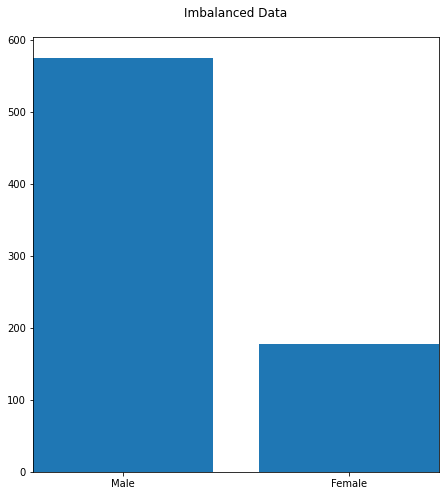

In [4]:
df_train['gender'].value_counts()
# Conver label to numerical data
df_train['gender_num'] = df_train.gender.map({'m':0, 'f':1})
male = df_train[df_train.gender == 'm'].shape[0]
female = df_train[df_train.gender == 'f'].shape[0]
plt.figure(1, figsize=(16, 8))
plt.subplot(1, 2, 1)
_ = plt.bar(["Male", "Female"], [male , female])
plt.title("Imbalanced Data", pad=20);plt.margins(x=0);

### Text Analysis

In [5]:
def plot_target_based_features(feature):
    x1 = df_train[df_train.gender_num == 0][feature]
    x2 = df_train[df_train.gender_num == 1][feature]
    plt.figure(1, figsize=(16, 8))
    plt.subplot(1, 1, 1)
    _ = plt.hist(x1, alpha=0.7, color="grey", bins=50)
    _ = plt.hist(x2, alpha=0.5, color="red", bins=50)

    return _

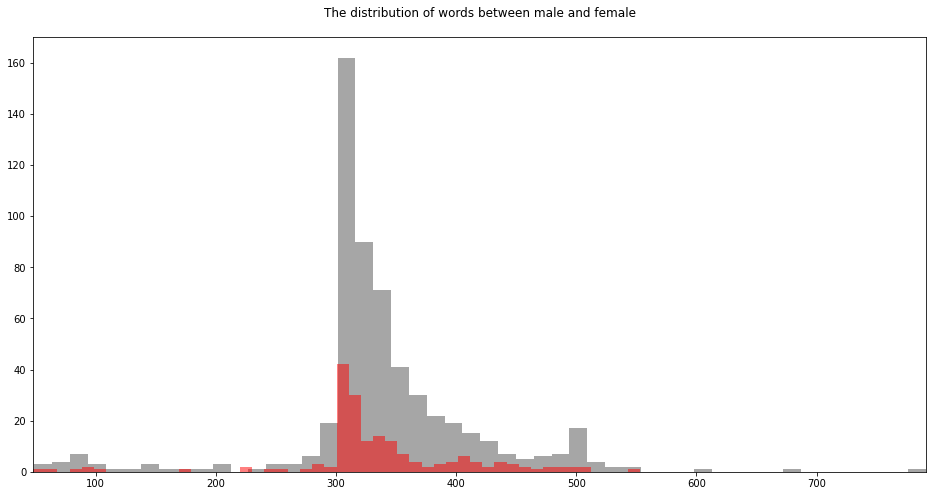

In [6]:
df_train["words_count"] = df_train.story.str.split().map(lambda x: len(x))
_ = plot_target_based_features("words_count")
plt.title("The distribution of words between male and female", pad=20);plt.margins(x=0);

In [7]:
df_train["unique_word_count"] = df_train.story.map(lambda x: len(set(str(x).split())))

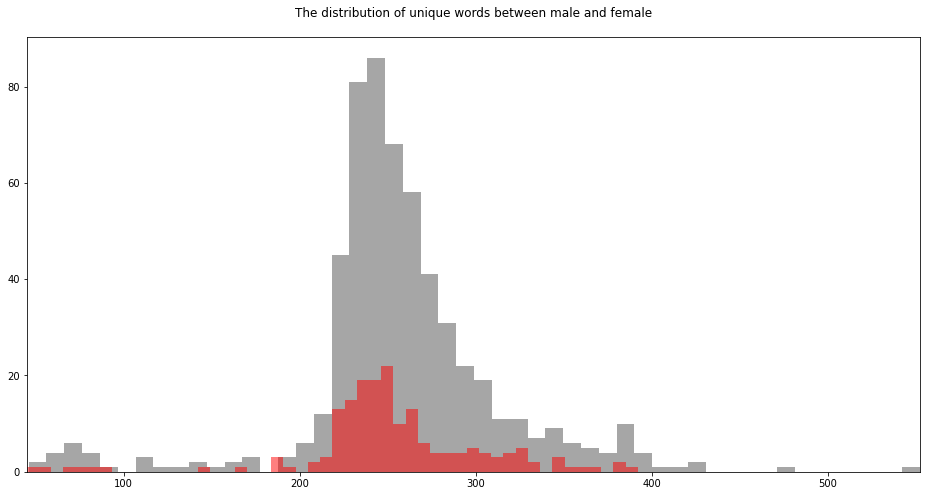

In [8]:
_ = plot_target_based_features("unique_word_count")
plt.title("The distribution of unique words between male and female", pad=20);plt.margins(x=0);

In [9]:
df_train['gender'] = df_train['gender_num']
df_train.drop(columns = 'gender_num', inplace=True)

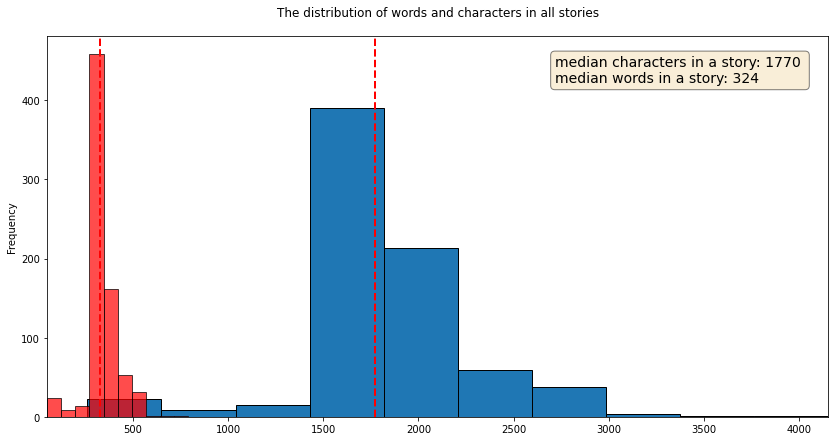

In [10]:
visulization_df = df_train.copy()
visulization_df['story_len'] = visulization_df['story'].map(lambda x: len(x))
visulization_df['story_n_words'] = visulization_df['story'].map(lambda x: len(x.split()))
fig, ax = plt.subplots(figsize=(14,7))
visulization_df.story_len.plot(kind='hist',edgecolor="k");
visulization_df.story_n_words.plot(kind='hist',color='r',edgecolor="k", alpha=0.7);
plt.axvline(visulization_df['story_len'].median(), ls = '--',color='r',lw=2);
plt.axvline(visulization_df['story_n_words'].median(), ls = '--',color='r',lw=2);
textstr = (f"median characters in a story: {round(visulization_df['story_len'].median())} \n"
           f"median words in a story: {round(visulization_df['story_n_words'].median())}")  
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5,edgecolor='black')
plt.text(0.65, 0.95, textstr, fontsize=14,transform=ax.transAxes,verticalalignment='top', bbox=props)
plt.title("The distribution of words and characters in all stories", pad=20);plt.margins(x=0);

In [11]:
df = df_train[['story','gender']].copy()
df

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",0
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,0
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,1
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",0
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,1
...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,0
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,0
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,0
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",1


***Balanced data gave worse results, stayed with unbalanced***

***Removing Hebrew words prefixes and panctuations***

In [12]:
def remove_prefix(text):
    prefix_1 = 'ו'
    prefix_2 = 'כש'
#     prefix_3 = 'ל'
    prefix = 'ש'
    no_prefix =""
    for word in text.split():
        if word.startswith(prefix) or word.startswith(prefix_1):
            word = word[1:]
        elif word.startswith(prefix_2):
            word = word[2:]

        no_prefix += str(word)
        no_prefix += str(" ")

    return no_prefix

In [13]:
def remove_punctuations(df, col):

    df[col] = df[col].str.replace('[^\u0590-\u05FF]', ' ')
    df[col]=df[col].apply(lambda x:remove_prefix(x))

    return df

In [14]:
df = remove_punctuations(df, 'story')
print("The amount of duplicated stories is:",df.duplicated().sum())
df.drop_duplicates(subset='story',keep = 'first')

The amount of duplicated stories is: 3


,story,gender
0,חבר הזמין אותי לחול לא באמת חשבתי זה יקרה פשוט...,0
1,לפני התגייסתי לצבא עשיתי כל מני מיונים ליחידות...,0
2,מאז התחילו הלימודים חלומו ל כל סטודנט זה הפנגו...,1
3,הייתי ילד מטוסים היה הדבר הכי ריתק אותי בתור ב...,0
4,הייתי מדריכה בכפר נוער מתאם הכפר היינו צריכים ...,1
...,...,...
747,בקיץ האחרון יצאתי לטיול עם חברים לטיול באיזור ...,0
748,אז לפני נה בדיוק טסתי לאמסטרדם עם ני חברים טוב...,0
750,לפני חודש עברנו לדירה בבית מש בעקבות משפחתי המ...,0
751,החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים ז...,1


***Looking at the most frequent n-grams***

In [15]:
def get_top_text_ngrams(corpus, ngrams=(1, 1), nr=None):
    """
    Creates a bag of ngrams and counts ngram frequency.
    
    Returns a sorted list of tuples: (ngram, count)
    """
    regex1 = r'(\w{2,20})\b'

    vec = CountVectorizer(ngram_range=ngrams, min_df=0.08, max_df=0.8,token_pattern  = regex1).fit(corpus)
    bag_of_words = vec.transform(corpus)
    df_train_bow = pd.DataFrame(bag_of_words.toarray(), columns=vec.get_feature_names_out())
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:nr], df_train_bow

In [16]:
top_text_bigrams, df_train_bow = get_top_text_ngrams(df.story, ngrams=(2, 3), nr=15) #336
top_text_bigrams

[('זה היה', 306),
 ('לא היה', 296),
 ('לאחר מכן', 294),
 ('את כל', 294),
 ('כל כך', 241),
 ('אני לא', 230),
 ('על מנת', 208),
 ('את זה', 203),
 ('זה לא', 201),
 ('היה לי', 158),
 ('לי את', 136),
 ('תוך כדי', 128),
 ('לאחר כמה', 122),
 ('כמה ימים', 118),
 ('הוא לא', 117)]

## Data Splitting

In [17]:
def decouple_data(df, label):
    y = df[label].copy()
    X = df.drop(columns=[label]).copy()
    return X, y

In [18]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.10, random_state = 42)
    return X_train, X_test, y_train, y_test

In [19]:
X, y = decouple_data(df, 'gender')
print("X shape is:", X.shape)
print("y shape is:", y.shape)

X shape is: (753, 1)
y shape is: (753,)


In [20]:
X_train, X_test, y_train, y_test = split_data(X, y)
print("X_train shape is:", X_train.shape)
print("y_train shape is:", y_train.shape)
print("X_test shape is:", X_test.shape)
print("y_test shape is:", y_test.shape)

X_train shape is: (677, 1)
y_train shape is: (677,)
X_test shape is: (76, 1)
y_test shape is: (76,)


## Model Implementation

* SGDClassifier had good f1 on the training but it was overfitting.
* CountVectorizer didn't work well with Perceptron.

In [21]:
regex1 = r'(\w{2,20})\b'

tfidf_perceptron_clf = Pipeline([
        ('vect', TfidfVectorizer(ngram_range=(1,4),token_pattern  = regex1, max_df = 0.60)),
        ('clf', Perceptron(penalty='elasticnet',
                              alpha=1e-7, random_state=42, tol=None))
    ])
    
tfidf_perceptron_clf.fit(X_train.story, y_train)

Pipeline(steps=[('vect',
                 TfidfVectorizer(max_df=0.6, ngram_range=(1, 4),
                                 token_pattern='(\\w{2,20})\\b')),
                ('clf',
                 Perceptron(alpha=1e-07, penalty='elasticnet', random_state=42,
                            tol=None))])

In [22]:
def predict(text_clf, y):
    return text_clf.predict(y)

In [23]:
y_pred=predict(tfidf_perceptron_clf, X_test.story)
confusion_matrix(y_test,y_pred)
print("The macro f1 score is:",f1_score(y_test, y_pred, average='macro'))
print('\n')
print(metrics.classification_report(y_test, y_pred))

array([[49,  8],
       [ 6, 13]])

The macro f1 score is: 0.7625000000000001


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        57
           1       0.62      0.68      0.65        19

    accuracy                           0.82        76
   macro avg       0.75      0.77      0.76        76
weighted avg       0.82      0.82      0.82        76

